In [2]:
# Gerando um novo CSV ordenado sem dados repetidos e com foco em SP

import pandas as pd
df = pd.read_csv('caso_full.csv')

df_filtered = df[(df['state'] == 'SP') & (df['is_repeated'] == False)].copy()
df_filtered.sort_values(by=['city', 'date'], inplace=True)

# CSV que contem dados de SP capital
df_filtered.to_csv('dados_SP.csv', index=False)

df_filtered_no_sp = df_filtered[df_filtered['city'] != 'São Paulo']

# CSV que não contem dados de SP capital 
df_filtered_no_sp.to_csv('dados_SP_sem.csv', index=False)


In [3]:
df_filtered.head(5)

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
3309655,Adamantina,3500105.0,2020-04-03,202014,35111.0,35068.0,False,False,1,2.84811,2020-04-03,0.0,0,1,city,SP,1,0
3309746,Adamantina,3500105.0,2020-04-04,202014,35111.0,35068.0,False,False,1,2.84811,2020-04-04,0.0,0,2,city,SP,0,0
3309846,Adamantina,3500105.0,2020-04-05,202015,35111.0,35068.0,False,False,0,NaN,2020-04-05,0.0,0,3,city,SP,-1,0
3309948,Adamantina,3500105.0,2020-04-06,202015,35111.0,35068.0,False,False,0,NaN,2020-04-06,0.0,0,4,city,SP,0,0
3310059,Adamantina,3500105.0,2020-04-07,202015,35111.0,35068.0,False,False,0,NaN,2020-04-07,0.0,0,5,city,SP,0,0


C:\Users\gabri\AppData\Local\Temp\ipykernel_40432\974298480.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_sp['date'] = pd.to_datetime(df_filtered_no_sp['date'])


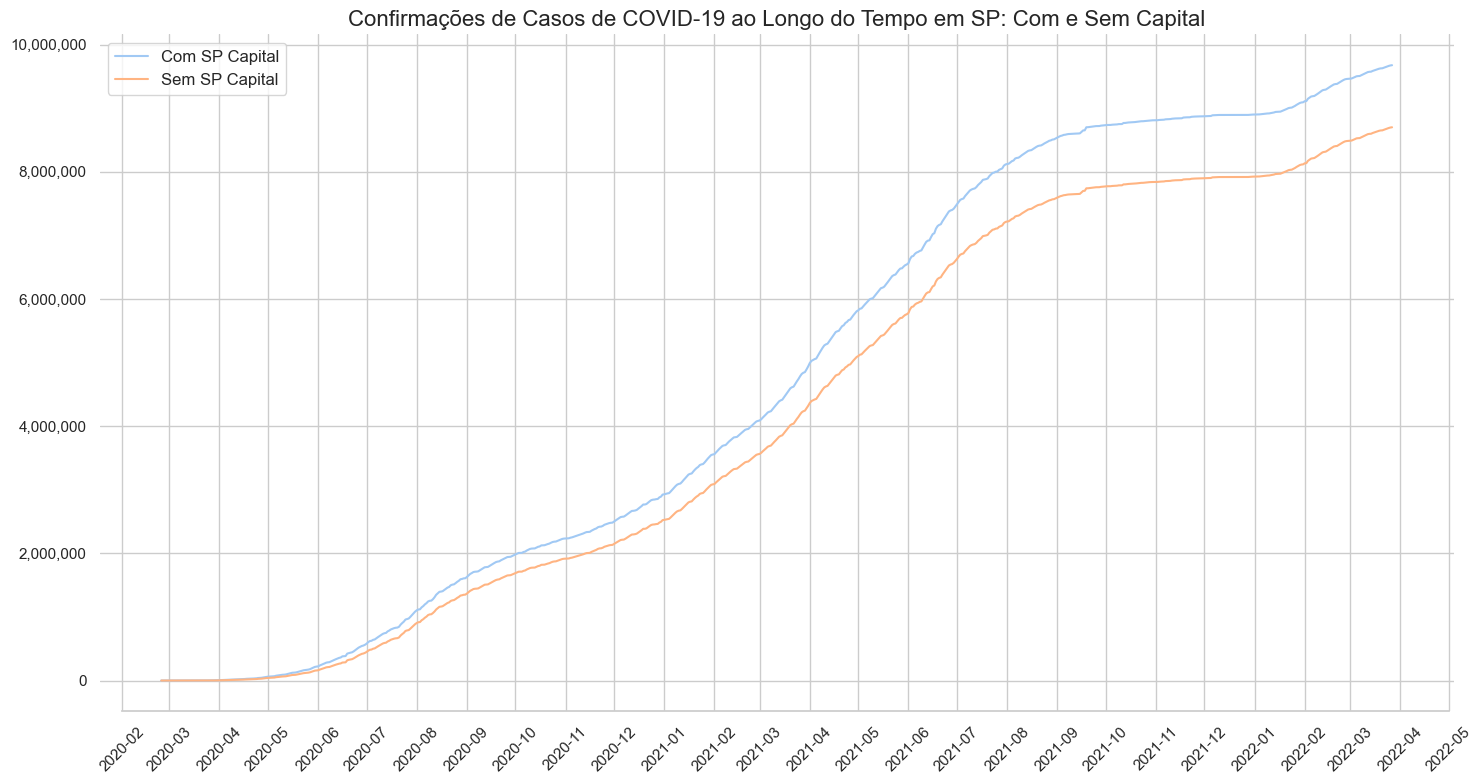

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Configurações estéticas do Seaborn
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Suponha que df_filtered e df_filtered_no_sp são DataFrames previamente definidos
# Aqui devem ser feitas as operações para defini-los corretamente, inclusive a filtragem para remover São Paulo

# Convertendo a coluna 'date' para datetime uma vez para cada DataFrame
df_filtered['date'] = pd.to_datetime(df_filtered['date'])
df_filtered_no_sp['date'] = pd.to_datetime(df_filtered_no_sp['date'])

# Recalculando os casos diários e cumulativos, agora apenas uma vez, após a conversão de 'date'
daily_cases = df_filtered.groupby('date')['new_confirmed'].sum().reset_index()
daily_cases['cumulative_confirmed'] = daily_cases['new_confirmed'].cumsum()

daily_cases_no_sp = df_filtered_no_sp.groupby('date')['new_confirmed'].sum().reset_index()
daily_cases_no_sp['cumulative_confirmed'] = daily_cases_no_sp['new_confirmed'].cumsum()

# Mantendo somente o último gráfico, com melhorias
plt.figure(figsize=(15, 8))
plt.plot(daily_cases['date'], daily_cases['cumulative_confirmed'], label='Com SP Capital', color=sns.color_palette("pastel")[0])
plt.plot(daily_cases_no_sp['date'], daily_cases_no_sp['cumulative_confirmed'], label='Sem SP Capital', color=sns.color_palette("pastel")[1])

plt.title('Confirmações de Casos de COVID-19 ao Longo do Tempo em SP: Com e Sem Capital', fontsize=16)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.grid(True)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.legend(fontsize=12)
sns.despine(trim=True, left=True)
plt.tight_layout()
plt.show()

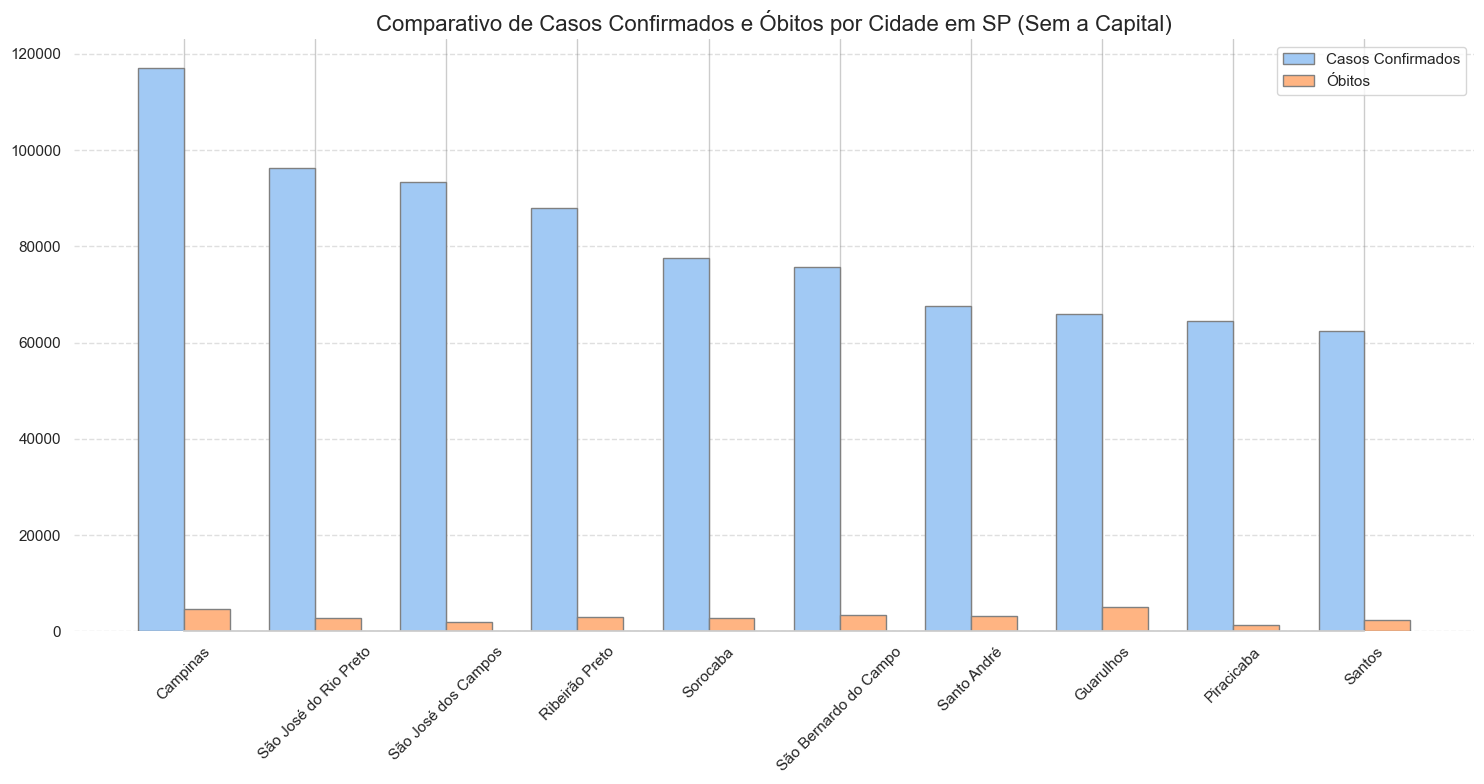

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Configurações estéticas do Seaborn
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Agrupar dados por cidade e somar os casos confirmados e óbitos
city_data_no_sp = df_filtered_no_sp.groupby('city').agg({'last_available_confirmed': 'max', 'last_available_deaths': 'max'})

# Ordenar os dados pelo número de casos confirmados para as top 10 cidades
city_data_sorted_no_sp = city_data_no_sp.sort_values('last_available_confirmed', ascending=False).head(10)

# Cria um gráfico de barras adjacentes para casos confirmados e óbitos
fig, ax = plt.subplots(figsize=(15, 8))

# Configurar a posição das barras no eixo X
indices = np.arange(len(city_data_sorted_no_sp))
bar_width = 0.35

# Barras para casos confirmados com bordas mais escuras
bars1 = ax.bar(indices - bar_width/2, city_data_sorted_no_sp['last_available_confirmed'], bar_width, label='Casos Confirmados', color=sns.color_palette("pastel")[0], edgecolor="grey")

# Barras para óbitos com bordas mais escuras
bars2 = ax.bar(indices + bar_width/2, city_data_sorted_no_sp['last_available_deaths'], bar_width, label='Óbitos', color=sns.color_palette("pastel")[1], edgecolor="grey")

# Adicionar nomes e título ao gráfico
ax.set_title('Comparativo de Casos Confirmados e Óbitos por Cidade em SP (Sem a Capital)', fontsize=16)
ax.set_xticks(indices)
ax.set_xticklabels(city_data_sorted_no_sp.index, rotation=45)
ax.legend()

# Adicionar uma grade para facilitar a leitura
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

# Remover bordas desnecessárias
sns.despine(trim=True, left=True)

# Ajustar layout para evitar cortar o título e as legendas
plt.tight_layout()

# Exibir o gráfico
plt.show()


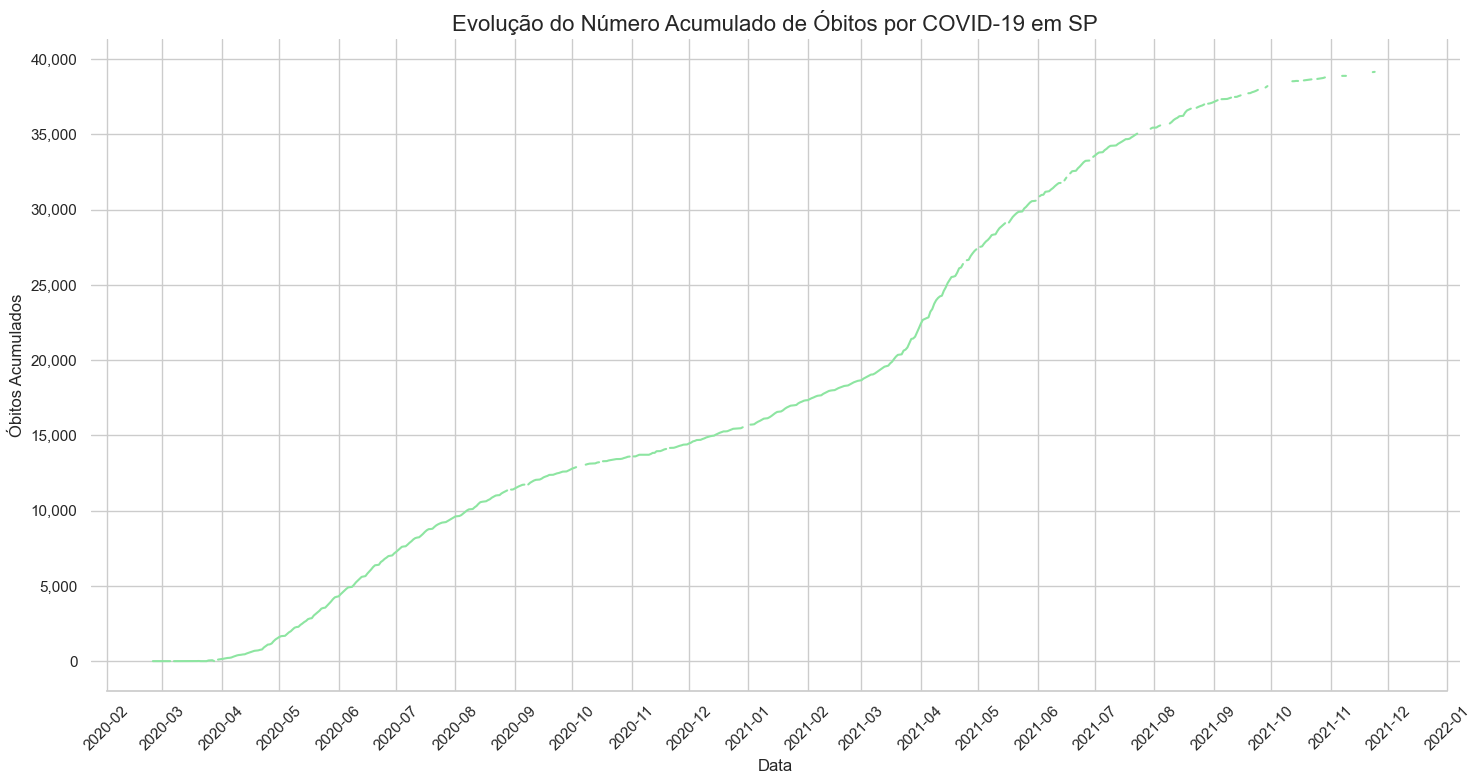

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Certifique-se de que 'df_filtered' esteja definido corretamente
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Aqui você deve garantir que a coluna 'new_deaths' não tenha valores discrepantes ou entradas duplicadas para a mesma data
# df_filtered = df_filtered.groupby('date').agg({'new_deaths': 'sum'}).reset_index() # Descomente se precisar agregar por data

df_filtered['cumulative_deaths'] = df_filtered.groupby('city')['new_deaths'].cumsum()

# Agora, agrupamos os dados por data e calculamos a soma acumulada dos óbitos.
daily_deaths = df_filtered.groupby('date').agg({'cumulative_deaths': 'max'}).reset_index()

# Configurações estéticas do Seaborn.
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Plotagem com estilo do Seaborn.
plt.figure(figsize=(15, 8))
plt.plot(daily_deaths['date'], daily_deaths['cumulative_deaths'], color=sns.color_palette("pastel")[2])

plt.title('Evolução do Número Acumulado de Óbitos por COVID-19 em SP', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Óbitos Acumulados', fontsize=12)

# Melhorando a formatação do eixo x.
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Melhorando a formatação do eixo y.
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

sns.despine(trim=True, left=True)
plt.tight_layout()
plt.show()
